Final parameters: 
[[4.14146131]
 [3.04006593]]


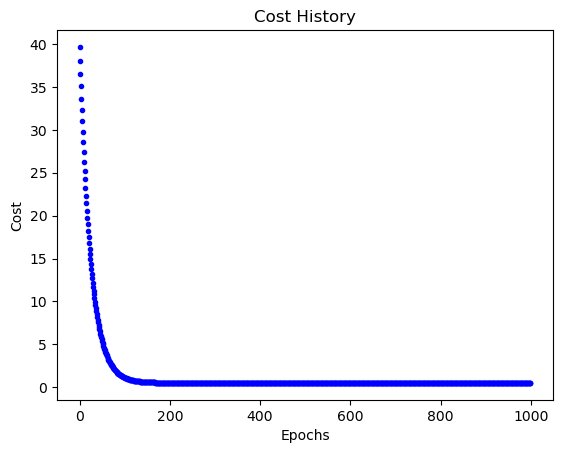

Predictions for X_new: 
[[ 4.14146131]
 [10.22159317]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.cost_history = []

    def predict(self, X):
        return X.dot(self.theta)

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
        return cost

    def fit(self, X, y):
        m = len(y)
        X_b = np.c_[np.ones((m, 1)), X]  # Add a bias term (column of ones) to the input features
        self.theta = np.random.randn(X_b.shape[1], 1)  # Initialize weights

        self.cost_history = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            gradients = (1 / m) * X_b.T.dot(self.predict(X_b) - y)
            self.theta -= self.learning_rate * gradients
            self.cost_history[epoch] = self.compute_cost(X_b, y)

    def plot_cost_history(self):
        plt.plot(range(self.epochs), self.cost_history, 'b.')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost History')
        plt.show()

    def get_params(self):
        return self.theta
# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize and train the linear regression model
lr_model = LinearRegression(learning_rate=0.01, epochs=1000)
lr_model.fit(X, y)

# Print the final parameters
print(f"Final parameters: \n{lr_model.get_params()}")

# Plot the cost history
lr_model.plot_cost_history()

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add a bias term
predictions = lr_model.predict(X_new_b)
print(f"Predictions for X_new: \n{predictions}")
